<a href="https://colab.research.google.com/github/Nushrat-Jahan/Computer-Vision/blob/main/Mid%20assignment/CIFAR_10_Entropy_loss_with_RMS_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
from keras.utils import np_utils
# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [5]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [6]:
 m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 36s 17ms/step - loss: 1.8428 - accuracy: 0.3160 - val_loss: 1.5774 - val_accuracy: 0.4165
Epoch 2/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4806 - accuracy: 0.4569 - val_loss: 1.4068 - val_accuracy: 0.4889
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3441 - accuracy: 0.5161 - val_loss: 1.3849 - val_accuracy: 0.5051
Epoch 4/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2656 - accuracy: 0.5470 - val_loss: 1.3531 - val_accuracy: 0.5046
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2069 - accuracy: 0.5690 - val_loss: 1.2653 - val_accuracy: 0.5506
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1562 - accuracy: 0.5852 - val_loss: 1.2148 - val_accuracy: 0.5657
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1201 - accuracy: 0.6008 - val_loss: 1.1830 -

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

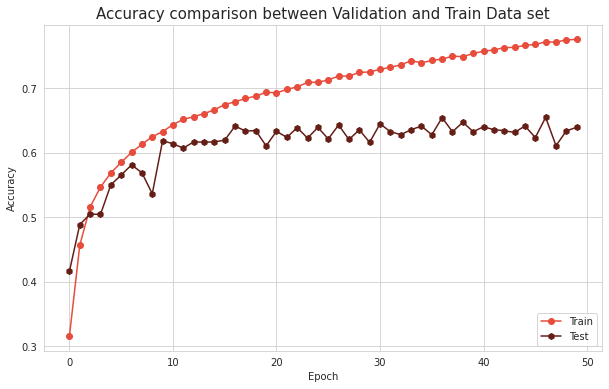

In [10]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

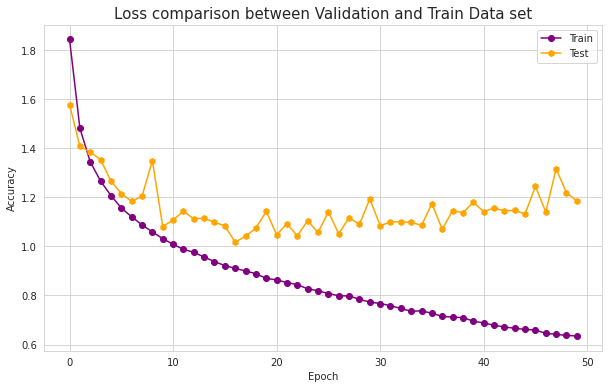

In [11]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [12]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

In [15]:
import tensorflow as tf
opt = tf.keras.optimizers.Adamax(lr=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [16]:
 m2=model2.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 [==============================] - 26s 223ms/step - loss: 2.6515 - accuracy: 0.2254 - val_loss: 2.3231 - val_accuracy: 0.1000
Epoch 2/100
100/100 [==============================] - 21s 206ms/step - loss: 2.1378 - accuracy: 0.2869 - val_loss: 2.5209 - val_accuracy: 0.1000
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 1.9610 - accuracy: 0.3318 - val_loss: 2.9136 - val_accuracy: 0.1000
Epoch 4/100
100/100 [==============================] - 21s 206ms/step - loss: 1.8350 - accuracy: 0.3682 - val_loss: 3.0563 - val_accuracy: 0.1071
Epoch 5/100
100/100 [==============================] - 21s 207ms/step - loss: 1.7288 - accuracy: 0.4032 - val_loss: 2.4993 - val_accuracy: 0.1934
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 1.6219 - accuracy: 0.4370 - val_loss: 1.9433 - val_accuracy: 0.3374
Epoch 7/100
100/100 [==============================] - 21s 207ms/step - loss: 1.5235 - accuracy: 0.4662 - val_loss: 1.6620 -

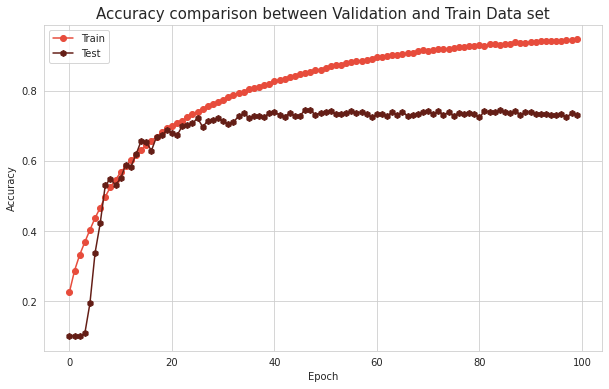

In [19]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


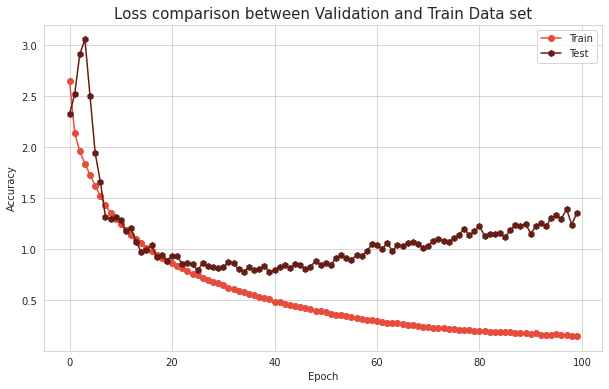

In [20]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [21]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(GlobalMaxPooling2D())
model3.add(Dense(500))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_17 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 48)       

In [22]:
#opt = keras.optimizers.Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [23]:
m3=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=150,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/150
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7368 - accuracy: 0.3452 - val_loss: 1.5008 - val_accuracy: 0.4524
Epoch 2/150
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4239 - accuracy: 0.4834 - val_loss: 1.3429 - val_accuracy: 0.5048
Epoch 3/150
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3019 - accuracy: 0.5319 - val_loss: 1.2713 - val_accuracy: 0.5394
Epoch 4/150
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2324 - accuracy: 0.5594 - val_loss: 1.2477 - val_accuracy: 0.5521
Epoch 5/150
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1786 - accuracy: 0.5776 - val_loss: 1.1722 - val_accuracy: 0.5757
Epoch 6/150
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1316 - accuracy: 0.5937 - val_loss: 1.1902 - val_accuracy: 0.5698
Epoch 7/150
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0994 - accuracy: 0.6092 - val_loss: 1

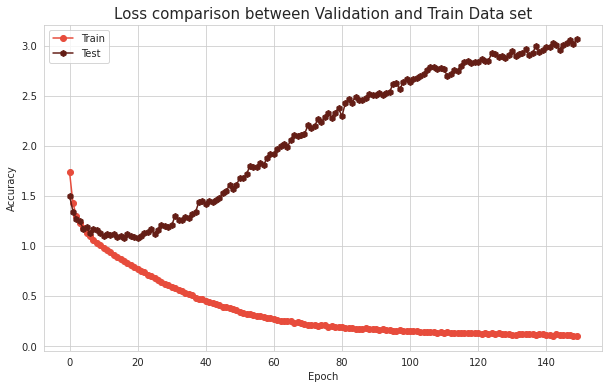

In [24]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
